In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#plt.style.use('seaborn')
%matplotlib inline
import seaborn; seaborn.set()

In [118]:
logins_df = pd.read_json('/logins.json')
logins_df.head(3)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37


In [119]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [120]:
logins_df.set_index('login_time', inplace=True)
logins_df['count'] = 1
logins_df = logins_df.resample('15T').sum()
logins_df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


Text(0, 0.5, '15 min interval login count')

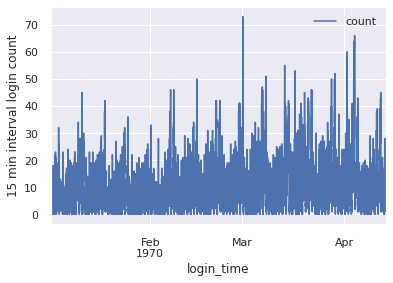

In [122]:
logins_df.plot()
plt.ylabel('15 min interval login count')

Text(0, 0.5, 'Daily login count')

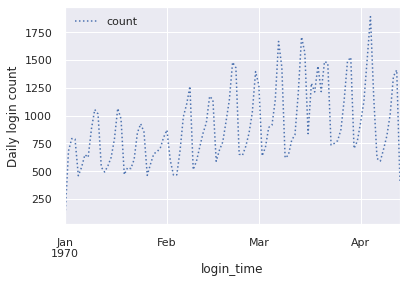

In [125]:
daily =  logins_df.resample('D').sum()
daily.plot(style=[':','--','-'])
plt.ylabel('Daily login count')

Text(0, 0.5, 'Weekly login count')

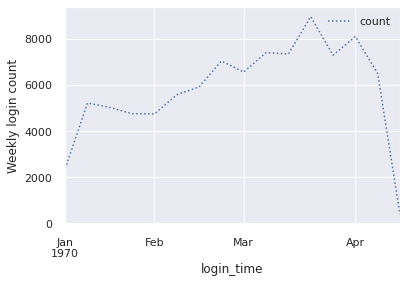

In [127]:
weekly =  logins_df.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly login count')

Text(0, 0.5, 'mean hourly count')

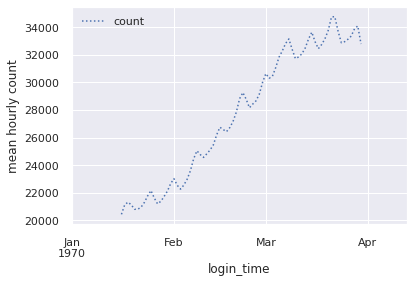

In [132]:
daily.rolling(30,center=True).sum().plot(style=[':','--','-'])
plt.ylabel('mean hourly count')

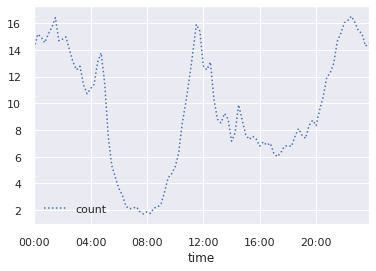

In [136]:
by_time = logins_df.groupby(logins_df.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':','--','-']);

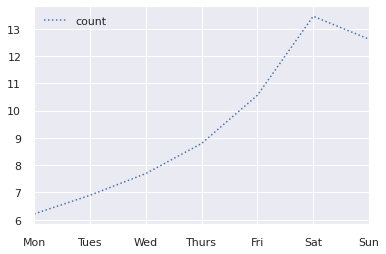

In [137]:
by_weekday = logins_df.groupby(logins_df.index.dayofweek).mean()
by_weekday.index = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=[':','--','-'])

In [0]:
weekend = np.where(logins_df.index.weekday < 5, 'Weekday','Weekend')
by_time = logins_df.groupby([weekend, logins_df.index.time]).mean()

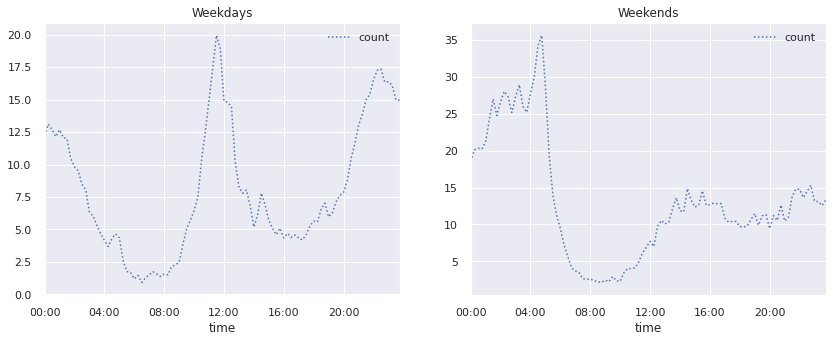

In [157]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(14,5))
by_time.loc['weekday'].plot(ax=ax[0], title='Weekdays' , xticks=hourly_ticks, style=[':','--','-'])
by_time.loc['weekend'].plot(ax=ax[1], title='Weekends' , xticks=hourly_ticks, style=[':','--','-'])